# Data by Artists

In this notebook, I will be using the **data_by_artist_o.csv** dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly
#import plotly.graph_objects as go
from IPython import get_ipython
#get_ipython().run_line_magic('matplotlib', 'inline')

sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

## Analysing the dataset

In [4]:
df_artist = pd.read_csv('data_by_artist_o.csv')

In [5]:
df_artist.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [27]:
nRows, nCols = df_artist.shape
print(f'This dataset has {nRows} rows and {nCols} columns.')

This dataset has 28680 rows and 16 columns.


In [6]:
df_artist.isna().sum()

genres              0
artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64

In [7]:
df_artist.nunique()

genres              10743
artists             28680
acousticness        14263
danceability        10752
duration_ms         23960
energy              12290
instrumentalness    15599
liveness            12624
loudness            21969
speechiness         11699
tempo               24860
valence             12024
popularity           4663
key                    12
mode                    2
count                 379
dtype: int64

In [8]:
df_artist.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901,0.759170,13.847211
std,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552,0.427595,53.372544
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110363,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000,1.000000,2.000000
50%,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000,1.000000,3.000000
75%,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000,1.000000,8.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000,1.000000,3169.000000


From the heatmap below we can tell that the energy is inversely correlated with acousticness. So is the loudliness.

We can also telle that valence is closely correlated with the danceabillity and loudness is closely correlated with energy.

<AxesSubplot:>

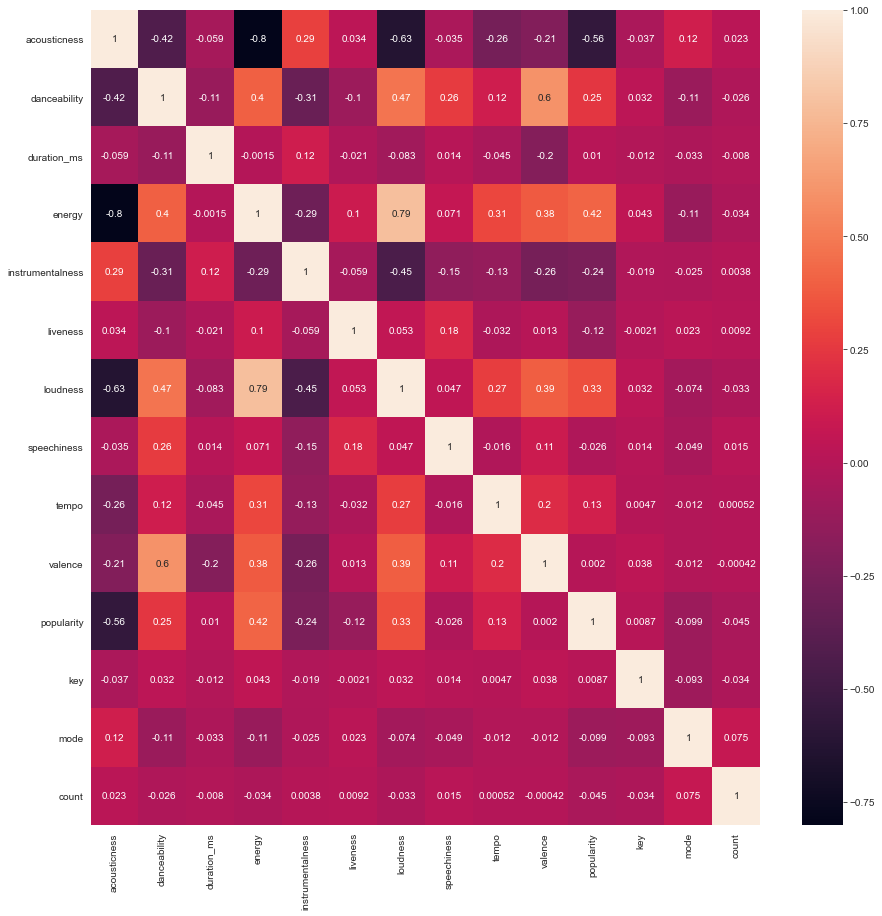

In [10]:
plt.figure(figsize = (15,15)) 
sns.heatmap(df_artist.corr(), annot=True)

## Preprocessing

I will not consider the features: mode, count and artist in the unsupervised prediction. I will drop them.

In [11]:
df2_artist = df_artist.drop(['mode', 'count', 'artists', 'genres'], axis = 1) 

In [12]:
X = df2_artist.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [26]:
df2_artist.to_csv("data_by_artists_preprocessed.csv")

## 2D PCA

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)

In [14]:
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,0.547009,-0.355267
1,1.063455,-0.249303
2,1.912311,-0.009540
3,1.796047,-0.279168
4,-0.151194,0.371584


<Figure size 432x288 with 0 Axes>

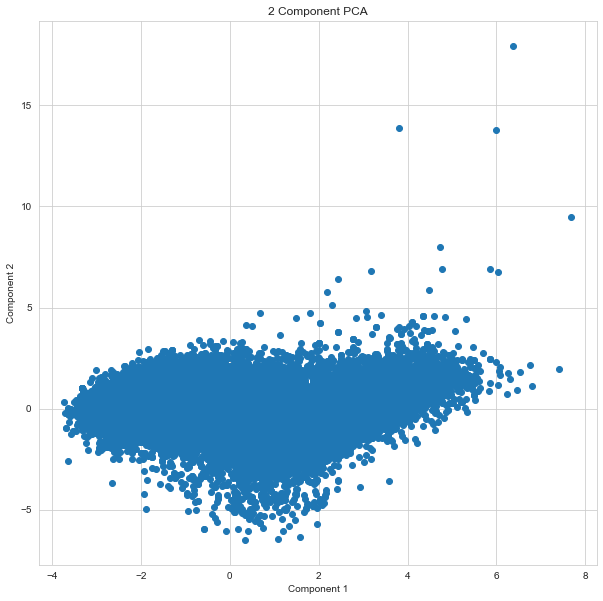

In [15]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'])

## 3D PCA

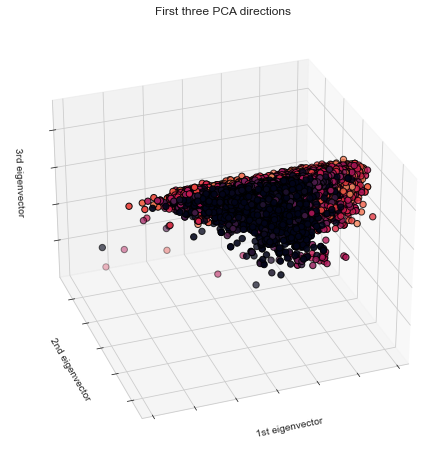

In [18]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

colors = ['navy', 'turquoise', 'darkorange']

y = df2_artist['popularity']

pca = PCA(n_components=3) #We set the number of components to 3 so we can transform to a 3D space
X_reduced = pca.fit(X).transform(X) # Now we fit the PCA model to X with fit() and apply it to X immediately with transform() 
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

## K-means clustering

In [19]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(principalComponents1)
    inertia.append(np.sqrt(kmeans.inertia_))

From the plot below I can understand that 25 clusters might be a good choice.

Text(0, 0.5, '$J(C_k)$')

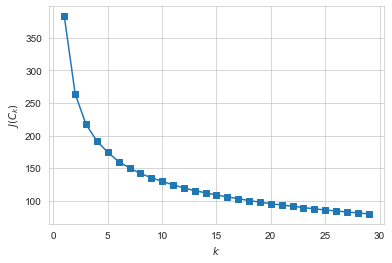

In [21]:
plt.plot(range(1, 30), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 25, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(principalComponents1)

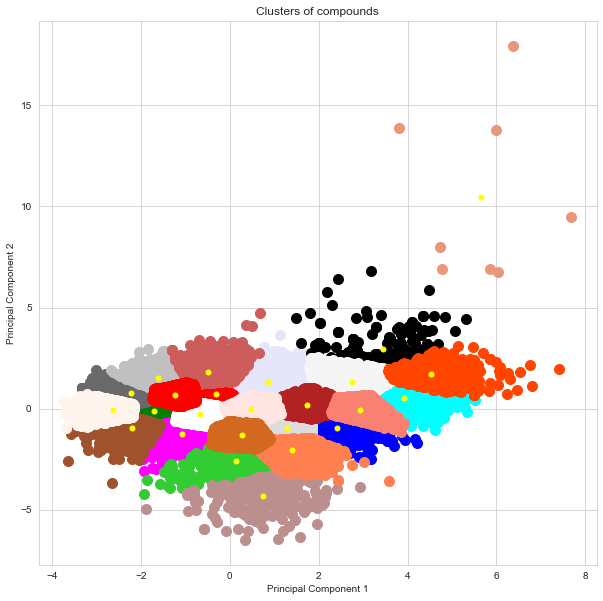

In [25]:
from matplotlib import colors as mcolors

plt.figure(figsize=(10,10))
plt.scatter(principalComponents1[y_kmeans == 0, 0], principalComponents1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(principalComponents1[y_kmeans == 1, 0], principalComponents1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(principalComponents1[y_kmeans == 2, 0], principalComponents1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(principalComponents1[y_kmeans == 3, 0], principalComponents1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(principalComponents1[y_kmeans == 4, 0], principalComponents1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(principalComponents1[y_kmeans == 5, 0], principalComponents1[y_kmeans == 5, 1], s = 100, c = 'limegreen', label = 'Cluster 6')
plt.scatter(principalComponents1[y_kmeans == 6, 0], principalComponents1[y_kmeans == 6, 1], s = 100, c = 'lavender', label = 'Cluster 7')
plt.scatter(principalComponents1[y_kmeans == 7, 0], principalComponents1[y_kmeans == 7, 1], s = 100, c = 'black', label = 'Cluster 8')
plt.scatter(principalComponents1[y_kmeans == 8, 0], principalComponents1[y_kmeans == 8, 1], s = 100, c = 'dimgray', label = 'Cluster 9')
plt.scatter(principalComponents1[y_kmeans == 9, 0], principalComponents1[y_kmeans == 9, 1], s = 100, c = 'silver', label = 'Cluster 10')
plt.scatter(principalComponents1[y_kmeans == 10, 0], principalComponents1[y_kmeans == 10, 1], s = 100, c = 'gainsboro', label = 'Cluster 11')
plt.scatter(principalComponents1[y_kmeans == 11, 0], principalComponents1[y_kmeans == 11, 1], s = 100, c = 'white', label = 'Cluster 12')
plt.scatter(principalComponents1[y_kmeans == 12, 0], principalComponents1[y_kmeans == 12, 1], s = 100, c = 'whitesmoke', label = 'Cluster 13')
plt.scatter(principalComponents1[y_kmeans == 13, 0], principalComponents1[y_kmeans == 13, 1], s = 100, c = 'rosybrown', label = 'Cluster 14')
plt.scatter(principalComponents1[y_kmeans == 14, 0], principalComponents1[y_kmeans == 14, 1], s = 100, c = 'indianred', label = 'Cluster 15')
plt.scatter(principalComponents1[y_kmeans == 15, 0], principalComponents1[y_kmeans == 15, 1], s = 100, c = 'firebrick', label = 'Cluster 16')
plt.scatter(principalComponents1[y_kmeans == 16, 0], principalComponents1[y_kmeans == 16, 1], s = 100, c = 'red', label = 'Cluster 17')
plt.scatter(principalComponents1[y_kmeans == 17, 0], principalComponents1[y_kmeans == 17, 1], s = 100, c = 'mistyrose', label = 'Cluster 18')
plt.scatter(principalComponents1[y_kmeans == 18, 0], principalComponents1[y_kmeans == 18, 1], s = 100, c = 'salmon', label = 'Cluster 19')
plt.scatter(principalComponents1[y_kmeans == 19, 0], principalComponents1[y_kmeans == 19, 1], s = 100, c = 'darksalmon', label = 'Cluster 20')
plt.scatter(principalComponents1[y_kmeans == 20, 0], principalComponents1[y_kmeans == 20, 1], s = 100, c = 'coral', label = 'Cluster 21')
plt.scatter(principalComponents1[y_kmeans == 21, 0], principalComponents1[y_kmeans == 21, 1], s = 100, c = 'orangered', label = 'Cluster 22')
plt.scatter(principalComponents1[y_kmeans == 22, 0], principalComponents1[y_kmeans == 22, 1], s = 100, c = 'sienna', label = 'Cluster 23')
plt.scatter(principalComponents1[y_kmeans == 23, 0], principalComponents1[y_kmeans == 23, 1], s = 100, c = 'seashell', label = 'Cluster 24')
plt.scatter(principalComponents1[y_kmeans == 24, 0], principalComponents1[y_kmeans == 24, 1], s = 100, c = 'chocolate', label = 'Cluster 25')
plt.scatter(principalComponents1[y_kmeans == 25, 0], principalComponents1[y_kmeans == 25, 1], s = 100, c = 'saddlebrown', label = 'Cluster 26')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'yellow', label = 'Centroids')
plt.title('Clusters of compounds')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.legend()
plt.show()